In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
import pickle 
warnings.filterwarnings('ignore')
 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
df5 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/merged_file_model.csv')
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/modelss.csv')#60% nan containing
df_app = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/application_data.csv')

In [ ]:
df5.shape

(288907, 354)

In [ ]:
df5.drop("Unnamed: 0",inplace=True,axis=1)
df5.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,No_of_PreviousApplications,Credit_to_Income,Annuity_to_Income,Goods_to_Income,No_of_DocumentsSubmitted,EXT_SCORES_AVG,EXT_SCORES_SUM,car_house_gender,income_vs_credit,child_plus,income_child,income VS. credit,incomeTran,realtyTran,carTran,assetIndex,FLAG_CONTACT_INFO,EXT_SOURCE_1,income_fam,credit_annity,total_ext_source,credit_on_rating,address_flag,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA,clusters,SK_ID_PREV_1,SK_ID_PREV_2,SK_ID_PREV_3,SK_ID_PREV_last,AMT_ANNUITY_y_1,AMT_ANNUITY_y_2,AMT_ANNUITY_y_3,AMT_ANNUITY_y_last,AMT_APPLICATION_1,AMT_APPLICATION_2,AMT_APPLICATION_3,AMT_APPLICATION_last,AMT_CREDIT_y_1,AMT_CREDIT_y_2,AMT_CREDIT_y_3,AMT_CREDIT_y_last,AMT_GOODS_PRICE_y_1,AMT_GOODS_PRICE_y_2,AMT_GOODS_PRICE_y_3,AMT_GOODS_PRICE_y_last,HOUR_APPR_PROCESS_START_y_1,HOUR_APPR_PROCESS_START_y_2,HOUR_APPR_PROCESS_START_y_3,HOUR_APPR_PROCESS_START_y_last,NFLAG_LAST_APPL_IN_DAY_1,NFLAG_LAST_APPL_IN_DAY_2,

In [ ]:
#if % of '1' < 5% then drop 
a=list(df5["TARGET"].value_counts()/len(df5["TARGET"])*100)
a[1]

8.208523850235542

In [ ]:
for column in df5.columns:
  if column=="TARGET":
    continue
  if len(df5[column].unique())==2:
    a=list(df5[column].value_counts()/len(df5[column])*100)
    if  a[1]<5:
      print(column)
      df5.drop(column, inplace=True, axis=1)

In [ ]:
print(df5.shape)
df5.head()

(288907, 219)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,No_of_PreviousApplications,Credit_to_Income,Annuity_to_Income,Goods_to_Income,No_of_DocumentsSubmitted,EXT_SCORES_AVG,EXT_SCORES_SUM,car_house_gender,income_vs_credit,child_plus,income_child,income VS. credit,incomeTran,realtyTran,carTran,assetIndex,FLAG_CONTACT_INFO,EXT_SOURCE_1,income_fam,credit_annity,total_ext_source,credit_on_rating,address_flag,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Sales staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_XNA,clusters,SK_ID_PREV_1,SK_ID_PREV_2,SK_ID_PREV_3,SK_ID_PREV_last,AMT_ANNUITY_y_1,AMT_ANNUITY_y_2,AMT_ANNUITY_y_3,AMT_ANNUITY_y_last,AMT_APPLICATION_1,AMT_APPLICATION_2,AMT_APPLICATION_3,AMT_APPLICATION_last,AMT_CREDIT_y_1,AMT_CREDIT_y_2,AMT_CREDIT_y_3,AMT_CREDIT_y_last,AMT_GOODS_PRICE_y_1,AMT_GOODS_PRICE_y_2,AMT_GOODS_PRICE_y_3,AMT_GOODS_PRICE_y_last,HOUR_APPR_PROCESS_START_y_1,HOUR_APPR_PROCESS_START_y_2,HOUR_APPR_PROCESS_START_y_3,HOUR_APPR_PROCESS_START_y_last,NFLAG_LAST_APPL_IN_DAY_2,NFLAG_LAST_APPL_IN_DAY_3,NFLAG_LAST_APPL_IN_DAY_last,DAYS_DECISION_1,DAYS_DECISION_2,DAYS_DECISION_3,DAYS_DECISION_last,SELLERPLACE_AREA_last_x,CNT_PAYMENT_1,CNT_PAYMENT_2,CNT_PAYMENT_3,CNT_PAYMENT_last,DAYS_FIRST_DRAWING_1,DAYS_FIRST_DRAWING_2,DAYS_FIRST_DRAWING_3,DAYS_FIRST_DRAWING_last,DAYS_FIRST_DUE_1,DAYS_FIRST_DUE_2,DAYS_FIRST_DUE_3,DAYS_FIRST_DUE_last,DAYS_LAST_DUE_1ST_VERSION_1,DAYS_LAST_DUE_1ST_VERSION_2,DAYS_LAST_DUE_1ST_VERSION_3,DAYS_LAST_DUE_1ST_VERSION_last,DAYS_LAST_DUE_1,DAYS_LAST_DUE_2,DAYS_LAST_DUE_3,DAYS_LAST_DUE_last,DAYS_TERMINATION_1,DAYS_TERMINATION_2,DAYS_TERMINATION_3,DAYS_TERMINATION_last,NFLAG_INSURED_ON_APPROVAL_1,NFLAG_INSURED_ON_APPROVAL_2,NFLAG_INSURED_ON_APPROVAL_3,NFLAG_INSURED_ON_APPROVAL_last,SELLERPLACE_AREA_last_y,NAME_CONTRACT_TYPE_y_last_Cash loans,NAME_CONTRACT_TYPE_y_last_Consumer loans,NAME_CONTRACT_TYPE_y_last_Revolving loans,WEEKDAY_APPR_PROCESS_START_y_last_FRIDAY,WEEKDAY_APPR_PROCESS_START_y_last_MONDAY,WEEKDAY_APPR_PROCESS_START_y_last_SATURDAY,WEEKDAY_APPR_PROCESS_START_y_last_SUNDAY,WEEKDAY_APPR_PROCESS_START_y_last_THURSDAY,WEEKDAY_APPR_PROCESS_START_y_last_TUESDAY,WEEKDAY_APPR_PROCESS_START_y_last_WEDNESDAY,NAME_CASH_LOAN_PURPOSE_last_XAP,NAME_CASH_LOAN_PURPOSE_last_XNA,NAME_CONTRACT_STATUS_last_Approved,NAME_CONTRACT_STATUS_l

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
 
 
 
x=df5.drop(["TARGET"],axis=1)
y=df5["TARGET"]
 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
 
 
 
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [ ]:
y_train.value_counts()

0    198921
1     17759
Name: TARGET, dtype: int64

In [ ]:
y_test.value_counts()

0    66271
1     5956
Name: TARGET, dtype: int64

In [ ]:
x.shape

(288907, 352)

In [ ]:
y.shape

(288907,)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[66271     0]
 [ 5956     0]]
Accuracy: 0.9175377628864552
f1_score: 0.0
Recall: 0.0


In [ ]:
df5["TARGET"].value_counts()

0    265192
1     23715
Name: TARGET, dtype: int64

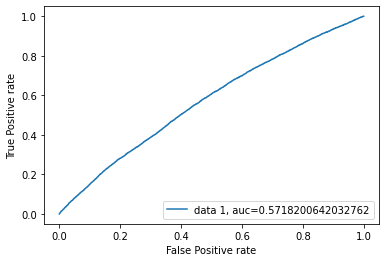

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc=4)
plt.show()

Good model has high tpr for low fpr.
ideal tpr=1,fpr=0



**0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.**



In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=None)
acc_list=[]
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))

print(f"Accuracy for 10 models : {acc_list}\n\n")
print(f"mean of accuracy for 10 models :{np.mean(acc_list)}")

TRAIN: [     0      1      2 ... 288904 288905 288906] TEST: [    14     17     25 ... 288890 288891 288893]
TRAIN: [     0      1      2 ... 288902 288904 288906] TEST: [    10     32     53 ... 288901 288903 288905]
TRAIN: [     0      1      2 ... 288904 288905 288906] TEST: [     7     13     21 ... 288875 288882 288896]
TRAIN: [     0      1      2 ... 288902 288903 288905] TEST: [    12     22     26 ... 288899 288904 288906]
TRAIN: [     1      2      4 ... 288904 288905 288906] TEST: [     0      3     51 ... 288846 288857 288860]
TRAIN: [     0      1      3 ... 288904 288905 288906] TEST: [     2      6     11 ... 288859 288861 288900]
TRAIN: [     0      1      2 ... 288904 288905 288906] TEST: [     4     34     39 ... 288885 288887 288897]
TRAIN: [     0      1      2 ... 288904 288905 288906] TEST: [    20     30     31 ... 288838 288869 288902]
TRAIN: [     0      1      2 ... 288904 288905 288906] TEST: [     8      9     16 ... 288883 288888 288898]
TRAIN: [     0     

In [ ]:
x=df.drop(["TARGET"],axis=1)
y=df["TARGET"]

X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(x,y,test_size=0.25,random_state=0)



logreg_f = LogisticRegression()
logreg_f.fit(X_train_f,y_train_f)
y_pred_f=logreg_f.predict(X_test_f)

cnf_matrix = metrics.confusion_matrix(y_test_f, y_pred_f)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test_f, y_pred_f))
print("f1_score:",metrics.f1_score(y_test_f, y_pred_f))
print("Recall:",metrics.recall_score(y_test_f, y_pred_f))

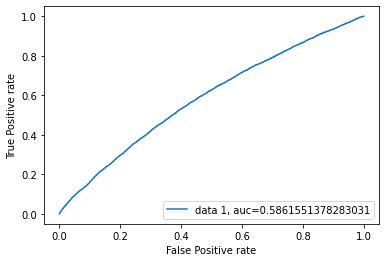

In [ ]:
y_pred_proba_f = logreg_f.predict_proba(X_test_f)[::,1]
fpr_f, tpr_f, _ = metrics.roc_curve(y_test_f,  y_pred_proba_f)
auc_f = metrics.roc_auc_score(y_test_f, y_pred_proba_f)
plt.plot(fpr_f,tpr_f,label="data 1, auc="+str(auc_f))
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc=4)
plt.show()

In [ ]:
print(y_pred_proba_f)

[0.09388696 0.05778035 0.09587968 ... 0.06649227 0.14632107 0.07536616]


In [ ]:
import matplotlib.pyplot as plt

importance_f = logreg_f.coef_
for i,v in enumerate(importance_f[0],1):
	print(f'Feature:{i}, Score:{v}')

plt.figure(figsize=(10,10))
# plot feature importance
x=np.arange(len(importance_f[0]))
plt.bar(x, importance_f[0])
plt.show()

In [ ]:
importance = logreg.coef_
for i,v in enumerate(importance[0],1):
	print(f'Feature:{i}, Score:{v}')

plt.figure(figsize=(10,10))
x=np.arange(len(importance[0]))
# plot feature importance
plt.bar(x, importance[0])
plt.show()

In [ ]:
xx=df5.drop(["TARGET"],axis=1)
yy=df5["TARGET"]
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
X_traint, X_testt, y_traint, y_testt = train_test_split(xx, yy, test_size=0.3, random_state=1)
# Train Decision Tree Classifer
clf = clf.fit(X_traint,y_traint)

#Predict the response for test dataset
y_predt = clf.predict(X_testt)
print("Accuracy:",metrics.accuracy_score(y_testt, y_predt))



Accuracy: 0.8470804056626631


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_testt, y_predt)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_testt, y_predt))
print("f1_score:",metrics.f1_score(y_testt, y_predt))
print("Recall:",metrics.recall_score(y_testt, y_predt))

[[72233  7205]
 [ 6049  1186]]
Accuracy: 0.8470804056626631
f1_score: 0.15179828490976577
Recall: 0.1639253628196268


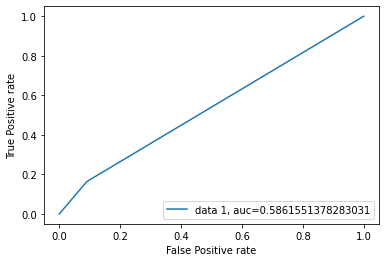

In [ ]:
y_pred_probat = clf.predict_proba(X_testt)[::,1]
fprt, tprt, _ = metrics.roc_curve(y_testt,  y_pred_probat)
auct = metrics.roc_auc_score(y_test_f, y_pred_proba_f)
plt.plot(fprt,tprt,label="data 1, auc="+str(auct))
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
 
lst=list(df5.columns)
ind=lst.index("TARGET")
del lst[ind]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = lst,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('loan.png')
#Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
 
 
x=df.drop(["TARGET"],axis=1)
y=df["TARGET"]
 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
 
base=RandomForestClassifier(n_estimators=1000)
base.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
y_pred=base.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[66263     8]
 [ 5945    11]]
Accuracy: 0.9175792986002465
f1_score: 0.0036820083682008366
Recall: 0.0018468770987239758


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [i*200 for i in range(1,5)]
max_features = ['auto', 'sqrt']
max_depth = [x*10 for x in range(1,5)]
max_depth.append(None)
min_samples_split = [2, 5, 7]
min_samples_leaf = [1, 2, 4, 5]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

rf =RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 5],
 'min_samples_split': [2, 5, 7],
 'n_estimators': [200, 400, 600, 800]}


In [ ]:
rf_random.fit(X_train, y_train)
para=rf_random.best_params_

print(para)

y_pred=rf_random.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
x=df.drop(["TARGET"],axis=1)
y=df["TARGET"]
 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
 
 
 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
df.drop("Unnamed: 0",inplace=True,axis=1)

# **Filtering features on score based on chi2**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=100)
df5.drop("Unnamed: 0",inplace=True,axis=1)
df5.drop("SK_ID_CURR",inplace=True,axis=1)
x=df5.drop(["TARGET"],axis=1)
y=df5["TARGET"]
x=abs(x)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.head()

,Specs,Score
0,CNT_CHILDREN,133.367
1,AMT_INCOME_TOTAL,0.242
2,AMT_CREDIT,337.507
3,AMT_ANNUITY,246.618
4,AMT_GOODS_PRICE,331.042


In [ ]:
featureScores=featureScores.sort_values(by="Score",ascending=False)

In [ ]:
featureScores

,Specs,Score
189,DAYS_FIRST_DRAWING_3,"88,001,833.819"
188,DAYS_FIRST_DRAWING_2,"75,935,134.525"
187,DAYS_FIRST_DRAWING_1,"61,364,146.872"
190,DAYS_FIRST_DRAWING_last,"44,392,021.616"
158,AMT_APPLICATION_1,"28,826,507.860"
...,...,...
297,NAME_GOODS_CATEGORY_last_Sport and Leisure,0.000
264,CODE_REJECT_REASON_last_XNA,0.000
13,FLAG_CONT_MOBILE,0.000
10,FLAG_MOBIL,0.000


In [ ]:
featureScores.shape

(351, 2)

In [ ]:
featureScores.transpose().head()

,189,188,187,190,158,166,162,193,159,167,160,168,198,191,163,202,164,206,69,161,195,169,154,196,192,155,153,194,199,156,203,157,152,165,200,197,205,182,211,179,178,204,201,180,181,150,151,79,26,186,106,85,27,24,100,148,23,250,104,63,29,308,31,2,4,7,84,81,65,64,184,260,171,124,120,25,3,37,257,83,80,146,113,170,5,109,12,56,78,310,101,330,34,140,183,258,0,18,110,334,337,121,345,17,14,11,114,332,119,331,123,286,59,214,301,323,329,340,173,130,172,127,255,185,328,320,344,88,248,62,346,243,305,279,111,322,319,213,302,67,60,339,131,239,341,317,125,145,209,8,273,129,263,347,47,122,266,282,306,265,272,87,68,49,212,208,207,103,108,32,244,143,293,313,76,75,57,116,252,44,321,304,149,99,128,82,210,343,147,98,315,89,45,217,141,74,21,92,333,307,39,230,336,277,291,73,142,55,42,144,281,219,246,342,66,16,324,316,133,335,20,33,237,249,312,90,105,30,259,28,95,46,227,223,137,222,118,58,233,270,77,326,231,229,298,292,226,72,40,318,245,54,309,288,48,22,218,275,271,296,61,299,295,139,241,97,9,247,91,290,53,242,285,134,35,117,107,338,234,240,280,327,126,314,215,221,276,236,262,284,15,220,232,19,300,102,177,138,348,311,325,289,287,216,303,349,50,235,94,41,175,274,253,269,135,238,86,256,251,294,268,6,71,1,132,278,136,228,283,350,96,43,225,36,261,115,112,176,93,52,254,267,51,224,38,174,297,264,13,10,70
Specs,DAYS_FIRST_DRAWING_3,DAYS_FIRST_DRAWING_2,DAYS_FIRST_DRAWING_1,DAYS_FIRST_DRAWING_last,AMT_APPLICATION_1,AMT_GOODS_PRICE_y_1,AMT_CREDIT_y_1,DAYS_FIRST_DUE_3,AMT_APPLICATION_2,AMT_GOODS_PRICE_y_2,AMT_APPLICATION_3,AMT_GOODS_PRICE_y_3,DAYS_LAST_DUE_1ST_VERSION_last,DAYS_FIRST_DUE_1,AMT_CREDIT_y_2,DAYS_LAST_DUE_last,AMT_CREDIT_y_3,DAYS_TERMINATION_last,income_child,AMT_APPLICATION_last,DAYS_LAST_DUE_1ST_VERSION_1,AMT_GOODS_PRICE_y_last,AMT_ANNUITY_y_1,DAYS_LAST_DUE_1ST_VERSION_2,DAYS_FIRST_DUE_2,AMT_ANNUITY_y_2,SK_ID_PREV_last,DAYS_FIRST_DUE_last,DAYS_LAST_DUE_1,AMT_ANNUITY_y_3,DAYS_TERMINATION_1,AMT_ANNUITY_y_last,SK_ID_PREV_3,AMT_CREDIT_y_last,DAYS_LAST_DUE_2,DAYS_LAST_DUE_1ST_VERSION_3,DAYS_TERMINATION_3,SELLERPLACE_AREA_last_x,SELLERPLACE_AREA_last_y,DAYS_DECISION_2,DAYS_DECISION_1,DAYS_TERMINATION_2,DAYS_LAST_DUE_3,DAYS_DECISION_3,DAYS_DECISION_last,SK_ID_PREV_1,SK_ID_PREV_2,total_ext_source,EXT_SOURCE_2,CNT_PAYMENT_last,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_M,EXT_SOURCE_3,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE_Pensioner,ORGANIZATION_TYPE_XNA,REG_CITY_NOT_LIVE_CITY,NAME_CONTRACT_STATUS_last_Refused,NAME_INCOME_TYPE_Working,No_of_DocumentsSubmitted,DEF_30_CNT_SOCIAL_CIRCLE,NAME_PRODUCT_TYPE_last_walk-in,DEF_60_CNT_SOCIAL_CIRCLE,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,CODE_GENDER_F,address_flag,EXT_SCORES_SUM,EXT_SCORES_AVG,CNT_PAYMENT_2,CODE_REJECT_REASON_last_SCOFR,HOUR_APPR_PROCESS_START_y_2,OCCUPATION_TYPE_Drivers,NAME_HOUSING_TYPE_With parents,LIVE_CITY_NOT_WORK_CITY,AMT_ANNUITY,FLAG_DOCUMENT_6,CODE_REJECT_REASON_last_HC,NAME_CONTRACT_TYPE_Revolving loans,credit_on_rating,ORGANIZATION_TYPE_Self-employed,NAME_FAMILY_STATUS_Single / not married,HOUR_APPR_PROCESS_START_y_1,REGION_POPULATION_RELATIVE,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_MON,credit_annity,CHANNEL_TYPE_last_AP+ (Cash loan),NAME_INCOME_TYPE_State servant,NAME_YIELD_GROUP_last_high,FLAG_DOCUMENT_3,ORGANIZATION_TYPE_Business Entity Type 3,CNT_PAYMENT_1,CODE_REJECT_REASON_last_LIMIT,CNT_CHILDREN,REGION_RATING_CLIENT_W_CITY,NAME_FAMILY_STATUS_Civil marriage,PRODUCT_COMBINATION_last_Card Street,PRODUCT_COMBINATION_last_Cash Street: high,OCCUPATION_TYPE_Accountants,PRODUCT_COMBINATION_last_POS industry with interest,REGION_RATING_CLIENT,FLAG_PHONE,FLAG_EMP_PHONE,NAME_FAMILY_STATUS_Widow,NAME_YIELD_GROUP_last_low_normal,NAME_HOUSING_TYPE_Rented apartment,NAME_YIELD_GROUP_last_low_action,OCCUPATION_TYPE_Core staff,NAME_GOODS_CATEGORY_last_Furniture,No_of_PreviousApplications,NAME_CONTRACT_TYPE_y_last_Revolving loans,NAME_GOODS_CATEGORY_last_XNA,NAME_SELLER_INDUSTRY_last_Furniture,NAME_YIELD_GROUP_last_XNA,PRODUCT_COMBINATION_last_C

In [ ]:
df5.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,No_of_PreviousApplications,Credit_to_Income,Annuity_to_Income,Goods_to_Income,No_of_DocumentsSubmitted,EXT_SCORES_AVG,EXT_SCORES_SUM,car_house_gender,income_vs_credit,child_plus,income_child,income VS. credit,incomeTran,realtyTran,carTran,assetIndex,FLAG_CONTACT_INFO,EXT_SOURCE_1,income_fam,credit_annity,total_ext_source,credit_on_rating,address_flag,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA,clusters,SK_ID_PREV_1,SK_ID_PREV_2,SK_ID_PREV_3,SK_ID_PREV_last,AMT_ANNUITY_y_1,AMT_ANNUITY_y_2,AMT_ANNUITY_y_3,AMT_ANNUITY_y_last,AMT_APPLICATION_1,AMT_APPLICATION_2,AMT_APPLICATION_3,AMT_APPLICATION_last,AMT_CREDIT_y_1,AMT_CREDIT_y_2,AMT_CREDIT_y_3,AMT_CREDIT_y_last,AMT_GOODS_PRICE_y_1,AMT_GOODS_PRICE_y_2,AMT_GOODS_PRICE_y_3,AMT_GOODS_PRICE_y_last,HOUR_APPR_PROCESS_START_y_1,HOUR_APPR_PROCESS_START_y_2,HOUR_APPR_PROCESS_START_y_3,HOUR_APPR_PROCESS_START_y_last,NFLAG_LAST_APPL_IN_DAY_1,NFLAG_LAST_APPL_IN_DAY_2,NFLAG_LAST_

In [ ]:
df.shape

(288907, 354)

In [ ]:
x_columns=list(featureScores.Specs[:100])
x_columns

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=df[x_columns]
y=df["TARGET"]

X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(x,y,test_size=0.25,random_state=0)



logreg_f = LogisticRegression()
logreg_f.fit(X_train_f,y_train_f)
y_pred_f=logreg_f.predict(X_test_f)

cnf_matrix = metrics.confusion_matrix(y_test_f, y_pred_f)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test_f, y_pred_f))
print("f1_score:",metrics.f1_score(y_test_f, y_pred_f))
print("Recall:",metrics.recall_score(y_test_f, y_pred_f))

[[66271     0]
 [ 5956     0]]
Accuracy: 0.9175377628864552
f1_score: 0.0
Recall: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
 
 
x=df[x_columns[:10]]
y=df["TARGET"]
 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
 
base=RandomForestClassifier(n_estimators=1000)
base.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
 
 
x=df[x_columns[:10]]
y=df["TARGET"]
 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
 
base=RandomForestClassifier(n_estimators=1000)
base.fit(X_train,y_train)
from sklearn import metrics
y_pred=base.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[65476   795]
 [ 5871    85]]
Accuracy: 0.9077076439558613
f1_score: 0.0248683440608543
Recall: 0.014271323035594358


# **With normalization and standardization**

In [ ]:
df5.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,No_of_PreviousApplications,Credit_to_Income,Annuity_to_Income,Goods_to_Income,No_of_DocumentsSubmitted,EXT_SCORES_AVG,EXT_SCORES_SUM,car_house_gender,income_vs_credit,child_plus,income_child,income VS. credit,incomeTran,realtyTran,carTran,assetIndex,FLAG_CONTACT_INFO,EXT_SOURCE_1,income_fam,credit_annity,total_ext_source,credit_on_rating,address_flag,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA,clusters,SK_ID_PREV_1,SK_ID_PREV_2,SK_ID_PREV_3,SK_ID_PREV_last,AMT_ANNUITY_y_1,AMT_ANNUITY_y_2,AMT_ANNUITY_y_3,AMT_ANNUITY_y_last,AMT_APPLICATION_1,AMT_APPLICATION_2,AMT_APPLICATION_3,AMT_APPLICATION_last,AMT_CREDIT_y_1,AMT_CREDIT_y_2,AMT_CREDIT_y_3,AMT_CREDIT_y_last,AMT_GOODS_PRICE_y_1,AMT_GOODS_PRICE_y_2,AMT_GOODS_PRICE_y_3,AMT_GOODS_PRICE_y_last,HOUR_APPR_PROCESS_START_y_1,HOUR_APPR_PROCESS_START_y_2,HOUR_APPR_PROCESS_START_y_3,HOUR_APPR_PROCESS_START_y_last,NFLAG_LAST_APPL_IN_DAY_1,NFLAG_LAST_APPL_IN_DAY_2,

In [ ]:
df5.shape

(288907, 353)

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(x,y,test_size=0.25,random_state=0)



logreg_f = LogisticRegression()
logreg_f.fit(X_train_f,y_train_f)
y_pred_f=logreg_f.predict(X_test_f)

cnf_matrix = metrics.confusion_matrix(y_test_f, y_pred_f)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test_f, y_pred_f))
print("f1_score:",metrics.f1_score(y_test_f, y_pred_f))
print("Recall:",metrics.recall_score(y_test_f, y_pred_f))
x=df5.drop("TARGET",axis=1)
y=df5["TARGET"]

X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(x,y,test_size=0.25,random_state=0)


norm = MinMaxScaler().fit(X_train_f)


X_train_norm = norm.transform(X_train_f)


X_test_norm = norm.transform(X_test_f)

In [ ]:
X_train_f.head()


,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,No_of_PreviousApplications,Credit_to_Income,Annuity_to_Income,Goods_to_Income,No_of_DocumentsSubmitted,EXT_SCORES_AVG,EXT_SCORES_SUM,car_house_gender,income_vs_credit,child_plus,income_child,income VS. credit,incomeTran,realtyTran,carTran,assetIndex,FLAG_CONTACT_INFO,EXT_SOURCE_1,income_fam,credit_annity,total_ext_source,credit_on_rating,address_flag,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA,clusters,SK_ID_PREV_1,SK_ID_PREV_2,SK_ID_PREV_3,SK_ID_PREV_last,AMT_ANNUITY_y_1,AMT_ANNUITY_y_2,AMT_ANNUITY_y_3,AMT_ANNUITY_y_last,AMT_APPLICATION_1,AMT_APPLICATION_2,AMT_APPLICATION_3,AMT_APPLICATION_last,AMT_CREDIT_y_1,AMT_CREDIT_y_2,AMT_CREDIT_y_3,AMT_CREDIT_y_last,AMT_GOODS_PRICE_y_1,AMT_GOODS_PRICE_y_2,AMT_GOODS_PRICE_y_3,AMT_GOODS_PRICE_y_last,HOUR_APPR_PROCESS_START_y_1,HOUR_APPR_PROCESS_START_y_2,HOUR_APPR_PROCESS_START_y_3,HOUR_APPR_PROCESS_START_y_last,NFLAG_LAST_APPL_IN_DAY_1,NFLAG_LAST_APPL_IN_DA

In [ ]:
logreg_f = LogisticRegression()
logreg_f.fit(X_train_f,y_train_f)
y_pred_f=logreg_f.predict(X_test_f)

cnf_matrix = metrics.confusion_matrix(y_test_f, y_pred_f)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test_f, y_pred_f))
print("f1_score:",metrics.f1_score(y_test_f, y_pred_f))
print("Recall:",metrics.recall_score(y_test_f, y_pred_f))

[[66271     0]
 [ 5956     0]]
Accuracy: 0.9175377628864552
f1_score: 0.0
Recall: 0.0


In [ ]:
a=X_train_f.copy()
a["target"]=y_train_f
arr_prob=logreg_f.predict_proba(X_train_f)
a["p"]=arr_prob[:,1:]
a[["target","p"]].head()

,target,p
110440,0,0.087
288635,0,0.061
22299,0,0.089
79012,0,0.074
257001,0,0.080


In [ ]:
logreg_f.classes_

array([0, 1])

## **Ks chart for Train data**

In [ ]:
#https://www.listendata.com/2019/07/KS-Statistics-Python.html
def ks(data=None,target=None, prob=None):
    data['target1'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target1']
    kstable = kstable.sort_values(by="min_prob", ascending=True).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target1'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target1'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100
 
    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    
    return(kstable)

In [ ]:
mydf = ks(data=a,target="target", prob="p")
display(mydf)

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.000,0.051,1085,20583,6.11%,10.35%,6.11%,10.35%,-4.200
2,0.051,0.061,1224,20444,6.89%,10.28%,13.00%,20.62%,-7.600
3,0.061,0.069,1328,20340,7.48%,10.23%,20.48%,30.85%,-10.400
4,0.069,0.074,1399,20269,7.88%,10.19%,28.36%,41.04%,-12.700
5,0.074,0.080,1604,20064,9.03%,10.09%,37.39%,51.13%,-13.700
6,0.080,0.084,1817,19851,10.23%,9.98%,47.62%,61.11%,-13.500
7,0.084,0.090,1995,19673,11.23%,9.89%,58.85%,71.00%,-12.100
8,0.090,0.099,2106,19562,11.86%,9.83%,70.71%,80.83%,-10.100
9,0.099,0.114,2372,19296,13.36%,9.70%,84.07%,90.53%,-6.500


Each decile has 22000 records

score is considered as probability which is give by model.

events= target 1

nonevents= target 0



## **Ks chart for test data**

In [ ]:
a=X_test_f.copy()
a["target"]=y_test_f
arr_prob=logreg_f.predict_proba(X_test_f)
a["p"]=arr_prob[:,0:1]
a[["target","p"]].head()

,target,p
99796,0,0.906
79006,0,0.942
264266,0,0.904
134871,0,0.957
64079,0,0.913


In [ ]:
mydf = ks(data=a,target="target", prob="p")
display(mydf)

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.682,0.886,908,6315,15.25%,9.53%,15.25%,9.53%,5.700
2,0.886,0.901,800,6423,13.43%,9.69%,28.68%,19.22%,9.500
3,0.901,0.910,718,6504,12.06%,9.81%,40.73%,29.04%,11.700
4,0.910,0.915,674,6549,11.32%,9.88%,52.05%,38.92%,13.100
5,0.915,0.920,583,6640,9.79%,10.02%,61.84%,48.94%,12.900
6,0.920,0.926,532,6690,8.93%,10.09%,70.77%,59.03%,11.700
7,0.926,0.931,459,6764,7.71%,10.21%,78.48%,69.24%,9.200
8,0.931,0.938,468,6754,7.86%,10.19%,86.33%,79.43%,6.900
9,0.938,0.949,414,6809,6.95%,10.27%,93.28%,89.70%,3.600


## **data standardization**

In [ ]:

from sklearn.preprocessing import StandardScaler
X_train_stand = X_train_f.copy()
X_test_stand = X_test_f.copy()

# numerical features
lst=[]
for column in df5.columns:
  if len(df5[column].unique())!=2:
      lst.append(column)


for i in lst:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
logreg_f = LogisticRegression()
logreg_f.fit(X_train_stand,y_train_f)
y_pred_f=logreg_f.predict(X_test_stand)

cnf_matrix = metrics.confusion_matrix(y_test_f, y_pred_f)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test_f, y_pred_f))
print("f1_score:",metrics.f1_score(y_test_f, y_pred_f))
print("Recall:",metrics.recall_score(y_test_f, y_pred_f))

[[66163   108]
 [ 5850   106]]
Accuracy: 0.9175100724105943
f1_score: 0.034359805510534844
Recall: 0.017797179314976493


In [ ]:
X_train_f.shape

(216680, 352)

In [ ]:
a=logreg_f.predict_proba(X_test_stad)

In [ ]:
len(a)

72227

In [ ]:
pd.qcut(X_train_f)

In [ ]:
y_hat_train=logreg_f.predict(X_train_f)

In [ ]:
res=y_hat_train-y_train_f
res=np.abs(res)
res.value_counts()

0    160910
1     55770
Name: TARGET, dtype: int64


## **Deployment data making**

AMT_credit:Credit amount 

AMT_ANNUITY:Loan annuity


DAYS_DECISION: decision days

total_ext_source:total external source

NAME_EDUCATION: Education

CODE_GENDER:gender

REGION_RATING_CLIENT:Client_rating

age(days birth)

CNT_FAM_MEMBERS:Family members count

NAME_CONTRACT_TYPE:CONTRACT TYPE

FLAG_OWN_CAR:Own's Car

FLAG_OWN_REALTY:Own's House

NAME_TYPE_SUITE:Suite type

NAME_FAMILY_STATUS:Family status

NAME_HOUSING:House type

In [ ]:
df.isna().sum().sort_values(ascending=False)

DAYS_FIRST_DRAWING_2                                                77500
DAYS_LAST_DUE_2                                                     77500
DAYS_FIRST_DUE_2                                                    77500
NFLAG_INSURED_ON_APPROVAL_2                                         77500
DAYS_LAST_DUE_1ST_VERSION_2                                         77500
DAYS_TERMINATION_2                                                  77500
DAYS_FIRST_DUE_1                                                    76178
DAYS_LAST_DUE_1ST_VERSION_1                                         76178
DAYS_FIRST_DRAWING_1                                                76178
DAYS_LAST_DUE_1                                                     76178
DAYS_TERMINATION_1                                                  76178
NFLAG_INSURED_ON_APPROVAL_1                                         76178
DAYS_LAST_DUE_last                                                  71676
DAYS_LAST_DUE_1ST_VERSION_last        

In [ ]:
lst=df.isna().sum()>0
lst=lst[lst].index

In [ ]:
for column in lst:
  df[column]=df[column].fillna(df[column].mean())

In [ ]:
df.isna().sum().sort_values(ascending=False)

PRODUCT_COMBINATION_last_POS others without interest                0
NAME_TYPE_SUITE_Family                                              0
NAME_TYPE_SUITE_Other_A                                             0
NAME_TYPE_SUITE_Other_B                                             0
NAME_TYPE_SUITE_Spouse, partner                                     0
NAME_TYPE_SUITE_Unaccompanied                                       0
NAME_INCOME_TYPE_Commercial associate                               0
NAME_INCOME_TYPE_Maternity leave                                    0
NAME_INCOME_TYPE_Pensioner                                          0
NAME_INCOME_TYPE_State servant                                      0
NAME_INCOME_TYPE_Student                                            0
NAME_INCOME_TYPE_Unemployed                                         0
NAME_INCOME_TYPE_Working                                            0
NAME_EDUCATION_TYPE_Academic degree                                 0
NAME_EDUCATION_TYPE_

In [ ]:
df[["AMT_CREDIT","AMT_ANNUITY","REGION_RATING_CLIENT","AMT_INCOME_TOTAL"]].head()

,AMT_CREDIT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_INCOME_TOTAL
0,-0.473,-0.166,2,0.147
1,1.790,0.614,1,0.427
2,-1.166,-1.439,2,-0.414
3,-0.713,0.187,2,-0.134
4,-0.202,-0.367,2,-0.190


In [ ]:
lst=[]
for column in df.columns:
  if column.startswith("NAME_INCOME_TYPE"):
    lst.append(column)
lst

['NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working']

In [ ]:
df_app["age"]=round(np.abs(df_app["DAYS_BIRTH"])/365)

In [ ]:
df["age"]=round(np.abs(df_app["DAYS_BIRTH"])/365)

In [ ]:
df[["SELLERPLACE_AREA_last_x","DAYS_DECISION_last","total_ext_source","CNT_FAM_MEMBERS","age"]].head()

,SELLERPLACE_AREA_last_x,DAYS_DECISION_last,total_ext_source,CNT_FAM_MEMBERS,age
0,500,-606,-3.202,1.000,26.000
1,200,-2341,-0.248,2.000,46.000
2,30,-815,0.809,1.000,52.000
3,-1,-181,0.427,2.000,52.000
4,-1,-1106,-0.583,1.000,55.000


In [ ]:
lst_edu=["NAME_EDUCATION_TYPE_Academic degree",
"NAME_EDUCATION_TYPE_Higher education",
"NAME_EDUCATION_TYPE_Incomplete higher",
"NAME_EDUCATION_TYPE_Lower secondary",
"NAME_EDUCATION_TYPE_Secondary / secondary special"]
 
lst_gender=["CODE_GENDER_F",
"CODE_GENDER_M",
"CODE_GENDER_XNA"]
 
lst_loan=[
          "NAME_CONTRACT_TYPE_y_last_Cash loans",
"NAME_CONTRACT_TYPE_y_last_Consumer loans",
"NAME_CONTRACT_TYPE_y_last_Revolving loans",
"NAME_CONTRACT_TYPE_y_last_XNA"]
          
lst_car=["FLAG_OWN_CAR_N","FLAG_OWN_CAR_Y"]
 
lst_house=["FLAG_OWN_REALTY_N","FLAG_OWN_REALTY_Y"]
 
lst_suite=["NAME_TYPE_SUITE_y_last_Children",
"NAME_TYPE_SUITE_y_last_Family",
"NAME_TYPE_SUITE_y_last_Group of people",
"NAME_TYPE_SUITE_y_last_Other_A",
"NAME_TYPE_SUITE_y_last_Other_B",
"NAME_TYPE_SUITE_y_last_Spouse, partner",
"NAME_TYPE_SUITE_y_last_Unaccompanied"]
 
lst_family_status=['NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow']
 
lst_house_type=['NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents']
 
lst_income=['NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working']
 #lst_edu,lst_gender,lst_loan,lst_car,lst_car,lst_house,lst_suite,lst_family_status,lst_house,lst_income

In [ ]:
df["age"].head()

0   26.000
1   46.000
2   52.000
3   52.000
4   55.000
Name: age, dtype: float64

In [ ]:
features=["AMT_CREDIT","AMT_ANNUITY","REGION_RATING_CLIENT","AMT_INCOME_TOTAL","DAYS_DECISION_last","total_ext_source","CNT_FAM_MEMBERS","age"]
lst=[lst_edu,lst_gender,lst_loan,lst_car,lst_house,lst_suite,lst_family_status,lst_house_type,lst_income]
for element in lst:
  features.extend(element)

In [ ]:
df_app[["AMT_CREDIT","AMT_ANNUITY","AMT_INCOME_TOTAL"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,"307,511.000","599,026.000","402,490.777","45,000.000","270,000.000","513,531.000","808,650.000","4,050,000.000"
AMT_ANNUITY,"307,499.000","27,108.574","14,493.737","1,615.500","16,524.000","24,903.000","34,596.000","258,025.500"
AMT_INCOME_TOTAL,"307,511.000","168,797.919","237,123.146","25,650.000","112,500.000","147,150.000","202,500.000","117,000,000.000"


In [ ]:
df[["DAYS_DECISION_last","total_ext_source","age"]]=abs(df[["DAYS_DECISION_last","total_ext_source","age"]])

In [ ]:
df[["DAYS_DECISION_last","total_ext_source","age"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DAYS_DECISION_last,"288,907.000",764.621,789.634,0.000,174.000,476.000,"1,124.000","2,922.000"
total_ext_source,"288,907.000",0.800,0.600,0.000,0.330,0.679,1.143,4.477
age,"288,907.000",43.933,11.969,21.000,34.000,43.000,54.000,69.000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(df[["DAYS_DECISION_last","total_ext_source","age"]])
 
 
df[["DAYS_DECISION_last","total_ext_source","age"]] = norm.transform(df[["DAYS_DECISION_last","total_ext_source","age"]])

In [ ]:
df[["DAYS_DECISION_last","total_ext_source","age"]].head()

,DAYS_DECISION_last,total_ext_source,age
0,0.207,0.715,0.104
1,0.801,0.055,0.521
2,0.279,0.181,0.646
3,0.062,0.095,0.646
4,0.379,0.130,0.708


In [ ]:
features

['AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_RATING_CLIENT',
 'AMT_INCOME_TOTAL',
 'DAYS_DECISION_last',
 'total_ext_source',
 'CNT_FAM_MEMBERS',
 'age',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'NAME_CONTRACT_TYPE_y_last_Cash loans',
 'NAME_CONTRACT_TYPE_y_last_Consumer loans',
 'NAME_CONTRACT_TYPE_y_last_Revolving loans',
 'NAME_CONTRACT_TYPE_y_last_XNA',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'NAME_TYPE_SUITE_y_last_Children',
 'NAME_TYPE_SUITE_y_last_Family',
 'NAME_TYPE_SUITE_y_last_Group of people',
 'NAME_TYPE_SUITE_y_last_Other_A',
 'NAME_TYPE_SUITE_y_last_Other_B',
 'NAME_TYPE_SUITE_y_last_Spouse, partner',
 'NAME_TYPE_SUITE_y_last_Unaccompanied',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Marr

In [ ]:
x=df[features]
df["TARGET"]=df["TARGET"].astype(int)
df["TARGET"]=df["TARGET"].apply(lambda x:1 if x>0 else 0)
y=df["TARGET"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(x,y,test_size=0.25,random_state=0)



logreg_f = LogisticRegression()
logreg_f.fit(X_train_f,y_train_f)
y_pred_f=logreg_f.predict(X_test_f)

cnf_matrix = metrics.confusion_matrix(y_test_f, y_pred_f)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test_f, y_pred_f))
print("f1_score:",metrics.f1_score(y_test_f, y_pred_f))
print("Recall:",metrics.recall_score(y_test_f, y_pred_f))


[[66258    13]
 [ 5950     6]]
Accuracy: 0.9174408462209424
f1_score: 0.0020083682008368202
Recall: 0.0010073875083948958


In [ ]:
import pickle
filename = 'model.pkl'
pickle.dump(logreg_f, open(filename, 'wb'))

# **Over sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy="minority")
x_over, y_over = oversample.fit_resample(x, y)

In [ ]:
print(len(x_over))
print(len(y_over))

530384
530384


In [ ]:
X_train_o,X_test_o,y_train_o,y_test_o=train_test_split(x_over,y_over,test_size=0.25,random_state=0)

# **Random forest with oversampling**

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train_o,X_test_o,y_train_o,y_test_o=train_test_split(x_over,y_over,test_size=0.25,random_state=0)


 
base=RandomForestClassifier(n_estimators=1000)
base.fit(X_train_o,y_train_o)



In [ ]:
y_pred_o=base.predict(X_test_o)
cnf_matrix = metrics.confusion_matrix(y_test_o, y_pred_o)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test_o, y_pred_o))
print("f1_score:",metrics.f1_score(y_test_o, y_pred_o))
print("Recall:",metrics.recall_score(y_test_o, y_pred_o))

[[65953   419]
 [   20 66204]]
Accuracy: 0.996689191227488
f1_score: 0.9966954466416252
Recall: 0.9996979946847064


In [ ]:
aa=pd.DataFrame(data=x_over,columns=features)
aa["target"]=y_over
aa.head()

,AMT_CREDIT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,DAYS_DECISION_last,total_ext_source,CNT_FAM_MEMBERS,age,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_CONTRACT_TYPE_y_last_Cash loans,NAME_CONTRACT_TYPE_y_last_Consumer loans,NAME_CONTRACT_TYPE_y_last_Revolving loans,NAME_CONTRACT_TYPE_y_last_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_y_last_Children,NAME_TYPE_SUITE_y_last_Family,NAME_TYPE_SUITE_y_last_Group of people,NAME_TYPE_SUITE_y_last_Other_A,NAME_TYPE_SUITE_y_last_Other_B,"NAME_TYPE_SUITE_y_last_Spouse, partner",NAME_TYPE_SUITE_y_last_Unaccompanied,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,target
0,-0.473,-0.166,2.000,0.147,0.207,0.715,1.000,0.104,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
1,1.790,0.614,1.000,0.427,0.801,0.055,2.000,0.521,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0
2,-1.166,-1.439,2.000,-0.414,0.279,0.181,1.000,0.646,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0
3,-0.713,0.187,2.000,-0.134,0.062,0.095,2.000,0.646,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0
4,-0.202,-0.367,2.000,-0.190,0.379,0.130,1.000,0.708,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0


In [ ]:
aa.to_csv("dataset16.csv",header=True)

In [ ]:
x=aa[features]
y=aa["target"]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=None)
acc_list=[]
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
    
    base=RandomForestClassifier(n_estimators=1000)
    base.fit(X_train,y_train)
    y_pred=base.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
 
print(f"Accuracy for 10 models : {acc_list}\n\n")
print(f"mean of accuracy for 10 models :{np.mean(acc_list)}")

TRAIN: [     0      1      2 ... 530381 530382 530383] TEST: [     6      9     28 ... 530367 530371 530377]
TRAIN: [     2      3      4 ... 530381 530382 530383] TEST: [     0      1      8 ... 530372 530373 530374]
TRAIN: [     0      1      3 ... 530380 530381 530382] TEST: [     2      7     15 ... 530376 530378 530383]
TRAIN: [     0      1      2 ... 530381 530382 530383] TEST: [     4     11     22 ... 530358 530368 530380]
TRAIN: [     0      1      2 ... 530378 530380 530383] TEST: [     3      5     13 ... 530379 530381 530382]
Accuracy for 10 models : [0.9973698351197715, 0.9969644692063313, 0.9969361878635331, 0.997294418205643, 0.9972661110901617]


mean of accuracy for 10 models :0.997166204297088


In [ ]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[52748   290]
 [    0 53038]]
Accuracy: 0.9972661110901617
f1_score: 0.9972735648609519
Recall: 1.0


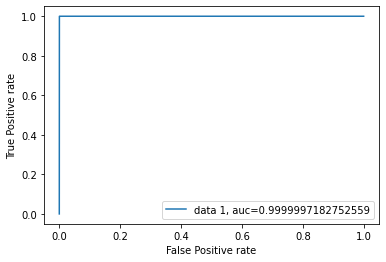

In [ ]:
y_pred_proba = base.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc=4)
plt.show()